<a href="https://colab.research.google.com/github/raven-gith/machinelearning1/blob/main/Tugas1/regresionautomobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Install mglearn
!pip install mglearn
import mglearn

In [ ]:
# Upload Csv
from google.colab import files
uploaded = files.upload()

Saving Automobile.csv to Automobile (5).csv


In [ ]:
# Dataset yang di upload
df = pd.read_csv(list(uploaded.keys())[0])
# Column
print("Dataset Columns:")
print(df.columns)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

Dataset Columns:
Index(['price', 'highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower',
       'compression-ratio', 'stroke', 'bore', 'fuel-system', 'engine-size',
       'num-of-cylinders', 'engine-type', 'curb-weight', 'height', 'width',
       'length', 'wheel-base', 'engine-location', 'drive-wheels', 'body-style',
       'num-of-doors', 'aspiration', 'fuel-type', 'make', 'normalized-losses',
       'symboling'],
      dtype='object')


In [ ]:
# Menghilangkan nilai
df.dropna(inplace=True)

In [ ]:
# Memilih fitur dan target
selected_features = ["wheel_base", "length", "width", "curb_weight", "engine_size", "horsepower", "city_mpg", "highway_mpg"]
existing_features = [feature for feature in selected_features if feature in df.columns]

if not existing_features:
    raise KeyError("None of the selected features exist in the dataset. Check column names.")

X = df[existing_features]
y = df["symboling"] if "symboling" in df.columns else None

if y is None:
    raise KeyError("Target variable 'symboling' not found in dataset.")

In [ ]:
# Membagi kumpulan data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi metric
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-Squared (R²):", r2)

# Penjelasan Persamaan Matematika
print("\nMathematical Explanation:")
print("1. Linear Regression Model: y = wX + b, where w is the weight (coefficient) and b is the bias (intercept).")
print("2. Mean Squared Error (MSE): 1/n * sum((y_true - y_pred)^2)")
print("3. Root Mean Squared Error (RMSE): sqrt(MSE)")
print("4. R-Squared (R²): 1 - (SS_residual / SS_total), where SS_residual is the sum of squared residuals and SS_total is the total sum of squares.")



Mean Squared Error (MSE): 1.3368651307147201
Root Mean Squared Error (RMSE): 1.1562288401154506
R-Squared (R²): 0.08918836071066305

Mathematical Explanation:
1. Linear Regression Model: y = wX + b, where w is the weight (coefficient) and b is the bias (intercept).
2. Mean Squared Error (MSE): 1/n * sum((y_true - y_pred)^2)
3. Root Mean Squared Error (RMSE): sqrt(MSE)
4. R-Squared (R²): 1 - (SS_residual / SS_total), where SS_residual is the sum of squared residuals and SS_total is the total sum of squares.


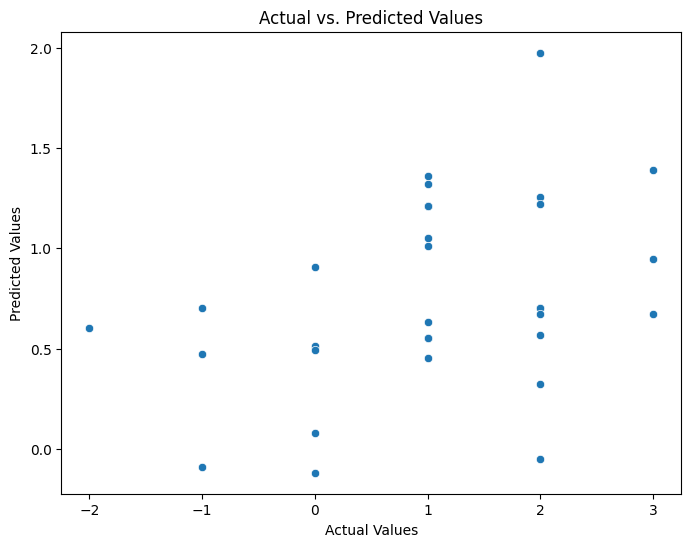

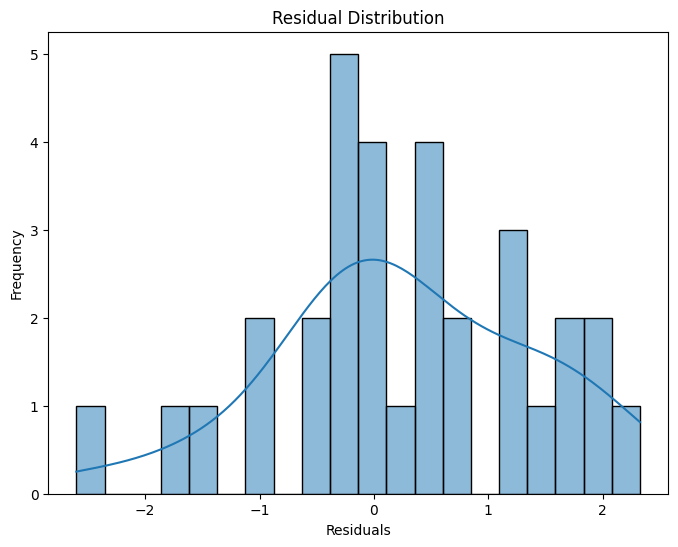

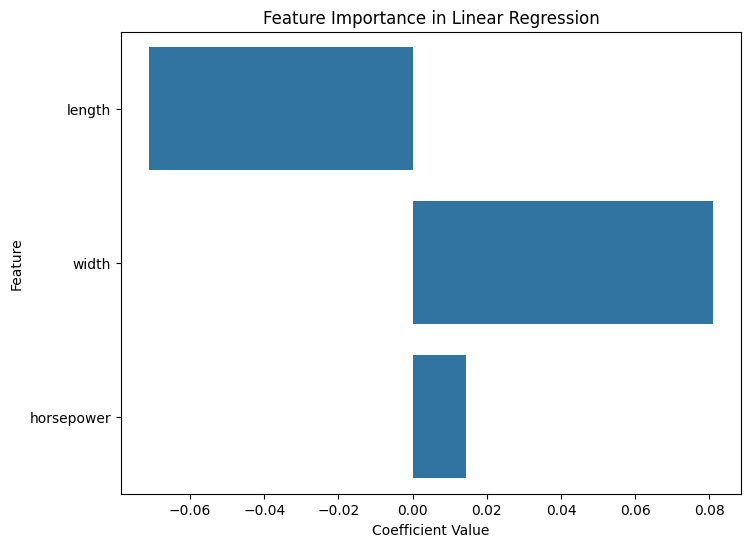

In [ ]:
# Visualisasi
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=20, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

# Visualisasi pentingnya fitur
plt.figure(figsize=(8, 6))
sns.barplot(x=model.coef_, y=existing_features)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance in Linear Regression")
plt.show()
